In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [14]:
df = pd.read_csv("preprocessed_df.csv")

df[["lat", "long"]] = MinMaxScaler().fit_transform(df[["lat", "long"]])
df.drop(columns=['0', '1']).columns

Index(['Unnamed: 0', 'lat', 'long', 'BIRD', 'CAT', 'DOG', 'EXOTIC', 'FOWL',
       'LIVESTOCK', 'OTHER', 'REPTILE', 'WILDLIFE', 'HERDING', 'HOUND',
       'MIXED', 'NONSPORTING', 'OTHER_BREED', 'SPORTING', 'TERRIER', 'TOY',
       'WORKING', 'D', 'F', 'K', 'M', 'N', 'U', 'EXTRA LARGE', 'LARGE',
       'MEDIUM', 'SMALL', 'EMACIATED', 'EXCELLENT', 'FAIR', 'GOOD', 'POOR',
       'SUMMER', 'SPRING', 'FALL', 'WINTER', 'NORMAL', 'FRIENDLY', 'NERVOUS',
       'DANGEROUS', 'SCARED'],
      dtype='object')

In [4]:
X = df.drop(["NORMAL","FRIENDLY","NERVOUS","DANGEROUS","SCARED"], axis=1)
y = np.argmax(df[["NORMAL","FRIENDLY","NERVOUS","DANGEROUS","SCARED"]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [9]:
clf = SVC(C=100, decision_function_shape='ovr')
y_pred = clf.fit(X_train, y_train)

In [10]:
y_pred = clf.predict(X_test)
y_pred.sum()

0

<Axes: ylabel='Count'>

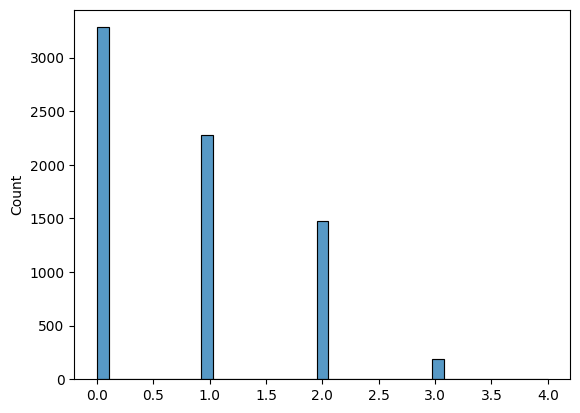

In [8]:
sns.histplot(y_test)